## How many fits would we get by chance?

[-0.005381416770221429, 0.20505432380272207, 0.0051953826053635485, 0.33669927494379803, 0.15169135363854452]


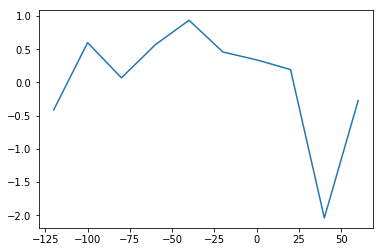

In [24]:
from numpy import *
from matplotlib.pylab import *
from scipy.stats import linregress
V = arange(-120,80,20)

FV = randn(10,10)
Fb = randn(10,3)
FVm = mean(FV,axis=-1)
Fbm = mean(Fb,axis=-1)
y = FVm-Fbm
x = V+60
plot(V,y)


coeffs, cv = polyfit(x, y, 1, cov = True)

dx1 = sqrt(cv[0][0])
dx2 = sqrt(cv[1][1])
results = coeffs.tolist()
results.extend([dx1,dx2])
p = poly1d(coeffs)
# fit values, and mean
yhat = p(x)                         # or [p(z) for z in x]
ybar = sum(y)/len(y)          # or sum(y)/len(y)
ssreg = sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
results.append(ssreg / sstot)

print(results)


In [60]:
x = V+60
data = []
for i in range(10000):
    FV = randn(10,10)
    Fb = randn(10,3)
    FVm = mean(FV,axis=-1)
    Fbm = mean(Fb,axis=-1)
    #plot(V,FVm-Fbm)
    y = FVm-Fbm
    coeffs, cv = polyfit(x, y, 1, cov = True)

    dx1 = sqrt(cv[0][0])
    dx2 = sqrt(cv[1][1])
    results = coeffs.tolist()
    results.extend([dx1,dx2])
    p = poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = mean(y)          # or sum(y)/len(y)
    ssres = sum((yhat-y)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results.append(1.0-ssres / sstot)
    data.append(results)

In [61]:
data = array(data)

In [62]:
sum(data[:,-1]>0.5)/1e4


0.0228

In [63]:
datath = data[data[:,-1]>0.5,:]

In [65]:
print("Percentage zero is excluded ~66%=",sum((datath[:,1]-datath[:,3])*(datath[:,1]+datath[:,3])>0)/datath.shape[0])
print("Percentage zero is excluded ~95%=",sum((datath[:,1]-2*datath[:,3])*(datath[:,1]+2*datath[:,3])>0)/datath.shape[0])

Percentage zero is excluded ~66%= 0.6535087719298246
Percentage zero is excluded ~95%= 0.3201754385964912
